In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, LeakyReLU,BatchNormalization, UpSampling2D, ReLU
import numpy as np
import BaseBlocks as bb

Found 30000 files belonging to 1 classes.


In [2]:
images = np.zeros((10000,128,128,3), dtype="float16")

for thing in bb.dataset.take(1):
    for i,image in enumerate(thing):
        images[i] = image

In [4]:
unet = bb.unet((128, 128, 3),32,3,2)
unet.compile(optimizer="adam", loss=tf.losses.BinaryCrossentropy())
unet.fit(images, bb.mask, epochs=1,batch_size=20)
unet.save('training/')

500/500 [==============================] - 2106s 4s/step - loss: 0.5049
INFO:tensorflow:Assets written to: training/assets


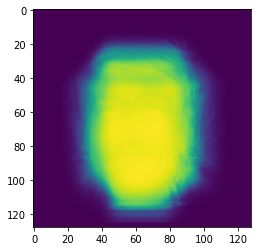

In [30]:
import matplotlib.pyplot as plt
testImage = tf.keras.utils.load_img('./ME.png', color_mode= "rgb", target_size=(128,128), interpolation="bilinear")
plt.imshow(testImage)
testImage = tf.keras.preprocessing.image.img_to_array(testImage)
testImage = tf.expand_dims(testImage, 0)


unet.predict(testImage)

output = unet.predict(testImage)
plt.imshow(output[0,:,:,1])

